# Dataset

In [1]:
# import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import librosa
from librosa import display
import seaborn as sns
import cv2

import warnings
warnings.filterwarnings("ignore")

In [2]:
# read csv file for basic information
soundCSV = pd.read_csv("metadata/UrbanSound8K.csv")
soundCSV

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [ ]:
# columns' mean
"""
* slice_file_name: 
The name of the audio file. The name takes the following format: [fsID]-[classID]-[occurrenceID]-[sliceID].wav, where:
[fsID] = the Freesound ID of the recording from which this excerpt (slice) is taken
[classID] = a numeric identifier of the sound class (see description of classID below for further details)
[occurrenceID] = a numeric identifier to distinguish different occurrences of the sound within the original recording
[sliceID] = a numeric identifier to distinguish different slices taken from the same occurrence

* fsID:
The Freesound ID of the recording from which this excerpt (slice) is taken

* start
The start time of the slice in the original Freesound recording

* end:
The end time of slice in the original Freesound recording

* salience:
A (subjective) salience rating of the sound. 1 = foreground, 2 = background.

* fold:
The fold number (1-10) to which this file has been allocated.

* classID:
A numeric identifier of the sound class:
0 = air_conditioner
1 = car_horn
2 = children_playing
3 = dog_bark
4 = drilling
5 = engine_idling
6 = gun_shot
7 = jackhammer
8 = siren
9 = street_music

* class:
The class name: air_conditioner, car_horn, children_playing, dog_bark, drilling, engine_idling, gun_shot, jackhammer, 
siren, street_music.
"""

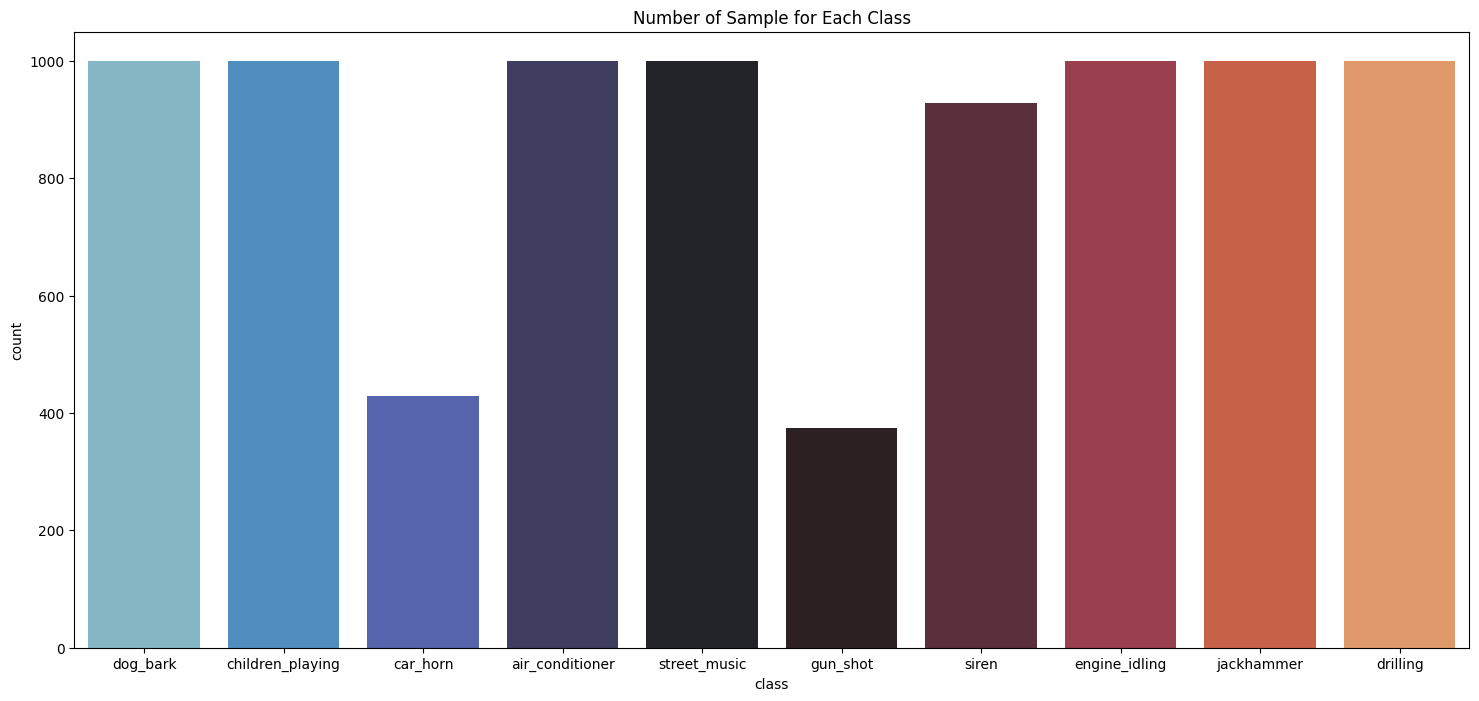

Classes and Number of Samples
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64


In [3]:
# visualize number of sample for each class
plt.figure(figsize=(18,8))
g = sns.countplot(soundCSV["class"], palette="icefire")
plt.title("Number of Sample for Each Class")
plt.show()
print("Classes and Number of Samples")
print(soundCSV["class"].value_counts())

## Preprocessing

In [4]:
# define a function for create a spectrogram
def createSpectrogram(audio):
    y, sr = librosa.load(audio)
    spec = librosa.feature.melspectrogram(y=y, sr=sr)
    spec_conv = librosa.amplitude_to_db(spec, ref=np.max)
    return spec_conv

In [ ]:
# fetch data and save wav files as spectrogram
data = []
label = []
vaw_name = []
path = "audio/fold"
for i in range(len(soundCSV)):
    fold_no = str(soundCSV.iloc[i]["fold"])
    file = soundCSV.iloc[i]["slice_file_name"]
    label.append(soundCSV.iloc[i]["classID"])
    filename = path + fold_no + "/" + file
    vaw_name.append(file)
    data.append(createSpectrogram(filename))
    
    # save spectrogram as png files
    librosa.display.specshow(data[i])
    plt.savefig(f'{vaw_name[i]}.png', bbox_inches='tight', pad_inches=0)

In [5]:
# a function that read an image and save it as grayscale using OpenCV
def turnGray(img):
    # Load the input image
    image = cv2.imread(img, 0)
    #cv2.imshow('Original', image)
    #cv2.waitKey(0)
 
    # Use the cvtColor() function to grayscale the image
    #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #cv2.imwrite("gs-.png", gray_image)

    #cv2.imshow('Grayscale', gray_image)
    #cv2.waitKey(0) 

    # Window shown waits for any key pressing event
    #cv2.destroyAllWindows()
    return image

In [6]:
# for create grayscale of spectrograms
gray_spec = []
for i in range(len(soundCSV)):
    gray_spec.append(turnGray((soundCSV["slice_file_name"][i]).replace("wav", "png")))

In [7]:
# see a example image shape
gray_spec[0].shape

(374, 500)

In [8]:
# see original image size and resize as optimal image size
print('Original Dimensions : ',gray_spec[0].shape)
 
image_size = 128
dim = (image_size, image_size)

# resize image
resized = cv2.resize(gray_spec[0], dim, interpolation = cv2.INTER_CUBIC)
 
print('Resized Dimensions : ',resized.shape)
 
cv2.imshow("Resized image", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

Original Dimensions :  (374, 500)
Resized Dimensions :  (128, 128)


In [9]:
# a function that resize grayscale images
def resize(img):
    resized = cv2.resize(img, dim, interpolation=cv2.INTER_CUBIC)
    #cv2.imshow('Resized', resized)
    #cv2.waitKey(0)
    return resized

In [10]:
# resize all grayscale images
resized_grays = []
for i in range(len(soundCSV)):
    resized_grays.append(resize(gray_spec[i]))

In [11]:
# see a example
resized_grays[0].shape

(128, 128)

In [12]:
# see a example image
cv2.imshow("Resized image", resized_grays[0])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
# a function that normalize grayscale images using openCV
def normalize(img):
    normalized = cv2.normalize(img, None, alpha=0,beta=200, norm_type=cv2.NORM_MINMAX)
    return normalized

In [14]:
# see a example normalized image
image_norm = cv2.normalize(resized_grays[0], None, alpha=0,beta=200, norm_type=cv2.NORM_MINMAX)

cv2.imshow('original Image', resized_grays[0])
cv2.imshow('Normalized Image', image_norm)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
# normalize all grayscale images
normalized_grays = []
for i in range(len(soundCSV)):
    normalized_grays.append(normalize(resized_grays[i]))

In [16]:
# size check
len(normalized_grays)

8732

In [17]:
# reshape images as 1D array and divide by 255.0 to scale between 0-1 
shaped_data = []
for i in range(len(soundCSV)):
    shaped_data.append(normalized_grays[i].reshape(-1)/ 255.0)

In [18]:
# see example shaped_data
shaped_data[0]

array([0.78431373, 0.        , 0.        , ..., 0.78431373, 0.78431373,
       0.78431373])

In [19]:
# turn the shaped_data to dataframe name as data
data = pd.DataFrame(shaped_data)
data

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0.784314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314
1,0.784314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314
2,0.784314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314
3,0.784314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314
4,0.784314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,0.784314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314
8728,0.784314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314
8729,0.784314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314
8730,0.784314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314


In [20]:
# define label
label = soundCSV["classID"]
label = pd.DataFrame(label)
label

,classID
0,3
1,2
2,2
3,2
4,2
...,...
8727,1
8728,1
8729,1
8730,1


In [21]:
# concat data and label
data = pd.concat([data, label], axis=1)
data

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,classID
0,0.784314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,3
1,0.784314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,2
2,0.784314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,2
3,0.784314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,2
4,0.784314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,0.784314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,1
8728,0.784314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,1
8729,0.784314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,1
8730,0.784314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,1


In [22]:
# get label
y_data = data["classID"]

# create train dataset
X_data = data.drop(["classID"], axis=1)
print("X_data:", X_data.shape)
print("y_data:", y_data.shape)

X_data: (8732, 16384)
y_data: (8732,)


In [23]:
# for train test split
from sklearn.model_selection import train_test_split

# split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.2,
                                                    random_state=128)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (6985, 16384)
X_test: (1747, 16384)
y_train: (6985,)
y_test: (1747,)


In [24]:
# split train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.15,
                                                    random_state=128)
print("X_train:", X_train.shape)
print("X_val:", X_test.shape)
print("y_train:", y_train.shape)
print("y_val:", y_test.shape)

X_train: (5937, 16384)
X_val: (1747, 16384)
y_train: (5937,)
y_val: (1747,)


In [25]:
# see train, test and validation dataset shape
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("X_val:", X_val.shape)
print("y_val:", y_val.shape)

print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (5937, 16384)
y_train: (5937,)
X_val: (1048, 16384)
y_val: (1048,)
X_test: (1747, 16384)
y_test: (1747,)


In [26]:
# save the X_train data as csv
X_train.to_csv('X_train.csv', index=False)

# save the y_train data as csv
y_train.to_csv('y_train.csv', index=False)

# save the X_val data as csv
X_val.to_csv('X_val.csv', index=False)

# save the y_val data as csv
y_val.to_csv('y_val.csv', index=False)

# save the X_test data as csv
X_test.to_csv('X_test.csv', index=False)

# save the y_test data as csv
y_test.to_csv('y_test.csv', index=False)

In [ ]:
# save all data as csv file
data.to_csv("UrbanSound.csv")